# PostScriptML: Data Preparation and EDA Notebook
## by Dolci Key 

## Import Libraries (Local)

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import shap

import glob
import os

from tensorflow.python.keras import models, layers
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.python.keras.applications import inception_v3, mobilenet_v2, vgg19, densenet
from tensorflow.python.keras.layers import Dense,GlobalAveragePooling2D
import tensorflow as tf
from PIL import Image, ImageOps, ImageFilter

import os, shutil
import argparse
import sys

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics.pairwise import cosine_similarity

import pickle

In [16]:
plt.style.use('fivethirtyeight')
sns.set_palette(sns.diverging_palette(250,700, s= 70 , l= 10, n= 8))

# Data 

### For this project, these are my own photos taken with a Nikon Z7. Photos have been pre-labeled as select and reject. All photographs have run through a batch compressor to resize 500 x 333 pixels. 

### Loading Test, Train, and Validation sets (local use)

In [28]:
# Train
train_reject = '/Volumes/DOLCI KEY 2019/Neural Network/compressed/train_reject_comp'
train_select = '/Volumes/DOLCI KEY 2019/Neural Network/compressed/train_select_comp'

# Test
test_reject = '/Volumes/DOLCI KEY 2019/Neural Network/compressed/test_reject_comp'
test_select = '/Volumes/DOLCI KEY 2019/Neural Network/compressed/test_select_comp'

# Validation 

val_reject = '/Volumes/DOLCI KEY 2019/Neural Network/compressed/validation_reject_comp'
val_select = '/Volumes/DOLCI KEY 2019/Neural Network/compressed/validation_select_comp'

In [29]:
# Take a 3 images from training reject and select

reject = [fn for fn in os.listdir(f'{train_reject}')]
select = [fn for fn in os.listdir(f'{train_select}')]

choose_reject = np.random.choice(train_reject, 3, replace = False)
choose_select= np.random.choice(train_select, 3, replace = False)

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/DOLCI KEY 2019/Neural Network/compressed/train_reject_comp'

# Class Imbalance

In [30]:
# Plot Class Imbalance
data = pd.read_csv('DATA/image_breakdown.csv')
data.head()

FileNotFoundError: [Errno 2] File DATA/image_breakdown.csv does not exist: 'DATA/image_breakdown.csv'

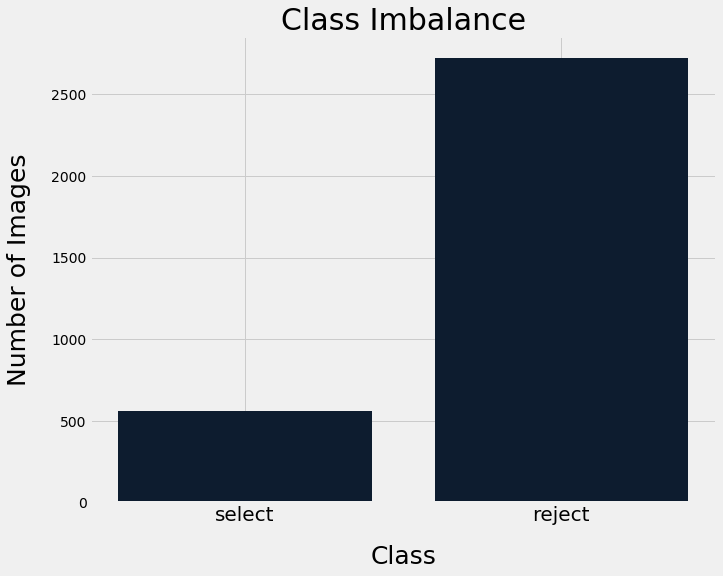

In [147]:
fig = plt.figure(figsize = (10, 8))
plt.bar(['select', 'reject'], [data.select.sum(), data.reject.sum()])
plt.title('Class Imbalance', fontsize = 30)
plt.xlabel('Class', fontsize = 25, labelpad = 20)
plt.ylabel('Number of Images', fontsize = 25, labelpad = 20)
plt.xticks(fontsize = 20)
plt.show()

fig.savefig('VISUALS/class_imbalance.png', bbox_inches= 'tight', padding_inches = 4, transparent = True);

# Racial Breakdown of Images

In [148]:
# Plot Racial Breakdown of Images

data['total_images'] = (data.select) + (data.reject)

In [149]:
data.head()

,model,race,select,reject,test_select,test_reject,train_select,train_reject,validation_select,validation_reject,total_images
0,Samayah,Bi-Racial,105.0,538.0,0.0,0.0,105.0,538.0,0.0,0.0,643.0
1,Bethany,African American,116.0,1065.0,0.0,0.0,116.0,1065.0,0.0,0.0,1181.0
2,Kristen,Caucasian,24.0,149.0,0.0,0.0,24.0,149.0,0.0,0.0,173.0
3,Joanna,Asian,125.0,644.0,125.0,644.0,0.0,0.0,0.0,0.0,769.0
4,Kristen_ii,Caucasian,189.0,327.0,0.0,0.0,0.0,0.0,189.0,327.0,516.0


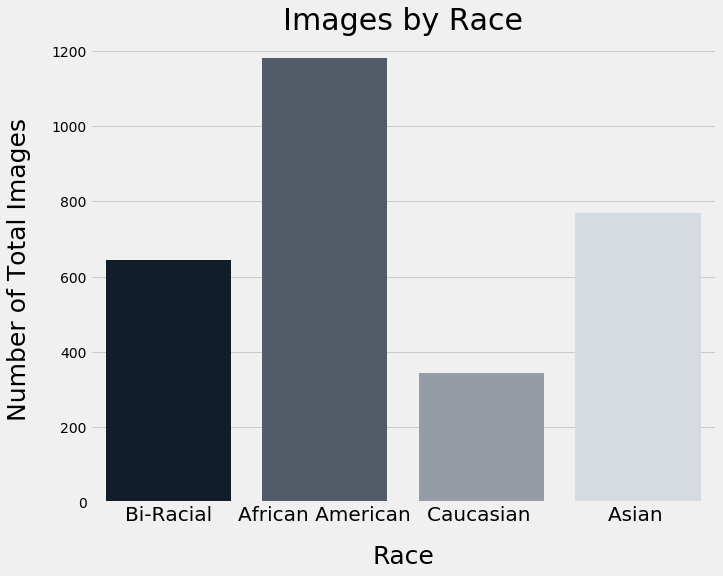

In [150]:
fig = plt.figure(figsize = (10, 8))
sns.barplot(x = 'race', y = 'total_images', data = data, ci = None)
plt.title('Images by Race', fontsize = 30)
plt.xlabel('Race', fontsize = 25, labelpad = 20)
plt.ylabel('Number of Total Images', fontsize = 25, labelpad = 20)
plt.xticks(fontsize = 20)
plt.show()

# Augmenting the Minority Class 

In [2]:
# Horizontal flip image augmentation


# convert to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
    
    # define subplot
    pyplot.subplot(330 + 1 + i)
    
    # generate batch of images
    batch = it.next()
    
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    
    # plot raw pixel data
    pyplot.imshow(image)
    
# show the figure
pyplot.show()


# Code derived from original code from Machine Learning Mastery (may not use this code but putting source in case)

NameError: name 'img' is not defined